1. Relação com os Objetivos do Projeto de Pesquisa

Este notebook atende diretamente aos seguintes Objetivos Específicos:

Objetivo Específico 3

Investigar como a gestão (administração da produção, logística e comercialização) afeta o desempenho do setor.

Evidenciado por:

- Diferenças de eficiência econômica entre municípios;
- Municípios com alta produtividade, mas baixo valor gerado;
- Municípios com baixa produção física e alto retorno econômico.

Objetivo Específico 4

Analisar o papel das políticas públicas, incentivos e investimentos no fortalecimento da cajucultura.

Evidenciado por:

- Assimetrias regionais persistentes;
- Concentração territorial da produção;
- Indícios de ausência ou concentração seletiva de apoio institucional.

3. Justificativa Analítica do Notebook

Após identificar quem produz, quanto produz e com que eficiência (Cadernos 01, 02 e 03), este notebook aprofunda a análise buscando responder:

Por que os resultados econômicos da cajucultura diferem tanto entre os municípios do Piauí?

A literatura indica que diferenças de desempenho agrícola não são explicadas apenas por fatores naturais, mas também por:

- Qualidade da gestão produtiva;

- Acesso à infraestrutura logística;

- Organização da comercialização;

- Inserção em políticas públicas e programas de fomento.

Este notebook atua, portanto, como ponte interpretativa entre os resultados empíricos e a discussão institucional.


4. Base de Dados Utilizada

Serão utilizadas exclusivamente bases já tratadas nos cadernos anteriores, evitando novas fontes e mantendo coerência metodológica.

Tabelas Utilizadas

Tabela 5 — Desempenho geral da cajucultura no Piauí

Tabela 6 — Produção municipal da cajucultura

Tabela 8 — Concentração produtiva municipal

Tabela 9 — Eficiência econômica municipal

 Não há inclusão de novas bases estatísticas: a análise é interpretativa e relacional.

6. Importação das Bibliotecas

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import unicodedata



In [71]:
def normalizar_texto(texto):
    if not isinstance(texto, str):
        return texto
    
    # Normaliza unicode (remove bytes quebrados)
    texto = unicodedata.normalize("NFKD", texto)
    
    # Remove caracteres não decodificáveis
    texto = texto.encode("ascii", errors="ignore").decode("ascii")
    
    return texto.strip()




In [72]:
def tratar_colunas_numericas(df, colunas):
    for col in colunas:
        if col in df.columns:
            df[col] = (
                df[col]
                .astype(str)
                .str.replace(",", ".", regex=False)
                .str.replace(";", "", regex=False)
            )
            df[col] = pd.to_numeric(df[col], errors="coerce")
    return df


In [73]:

BASE_PATH = Path("..") / "Pesquisa Agrícola Municipal (PAM)"
def carregar_csv_ibge(nome_arquivo):
    df = pd.read_csv(
        BASE_PATH / nome_arquivo,
        sep=None,               # detecta automaticamente ; ou ,
        engine="python",
        encoding="latin1"
    )
    return df



In [74]:
# Produção municipal (Tabela 6)
piaui_geral = pd.read_csv(
    BASE_PATH / "5. caju_castanha_piaui_desempenho_geral.csv",
    sep=",",
    encoding="latin1"
)
piaui_municipios = pd.read_csv(
    BASE_PATH / "6. caju_castanha_piaui_municipios.csv",
    sep=",", 
   encoding="latin1"
    )

# Concentração produtiva (Tabela 8)
concentracao = pd.read_csv(
    BASE_PATH / "8. Análise de concentração produtiva municipal.csv",
    sep=",",
    encoding="latin1"
  
)

# Eficiência econômica (Tabela 9)
eficiencia = pd.read_csv(
    BASE_PATH / "9. Análise de eficiência econômica municipal (PIAUÍ).csv",
    sep=",",
    encoding="latin1"
)


In [75]:
import unicodedata
import re

def corrigir_nome_municipio(texto):
    if not isinstance(texto, str):
        return texto

    # Remove caracteres invisíveis e de controle
    texto = re.sub(r"[\u00ad\u200b\u200e\u200f]", "", texto)

    # Normalização Unicode (remove acentos de forma segura)
    texto = unicodedata.normalize("NFKD", texto)
    texto = texto.encode("ascii", errors="ignore").decode("ascii")

    # Remover múltiplos espaços
    texto = re.sub(r"\s+", " ", texto)

    return texto.strip()


In [76]:

# Copiar a base municipal
base_municipal = piaui_municipios.copy()

# Limpeza completa da variável monetária
base_municipal["valor_total_producao"] = (
    base_municipal["valor_total_producao;;;;;;;;"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.replace(r"[^\d\.]", "", regex=True)
)

base_municipal["valor_total_producao"] = pd.to_numeric(
    base_municipal["valor_total_producao"],
    errors="coerce"
)

In [77]:
import re

def normalizar_colunas(df):
    df.columns = (
        df.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace(r"[^\w]", "", regex=True)  # REMOVE ;;;;;;;; etc
    )
    return df

piaui_municipios = normalizar_colunas(piaui_municipios)


piaui_municipios.head()

,ano,id_municipio,nome_municipio,produto,area_colhida_ha,producao_total,produtividade_media,valor_total_producao
0,1974,2200103,Agricolandia,Caju,15,780.0,52000.0,0.0;;;;;;;;
1,1974,2200400,Altos,Caju,180,4500.0,25000.0,0.0;;;;;;;;
2,1974,2200509,Amarante,Caju,38,1900.0,50000.0,0.0;;;;;;;;
3,1974,2200608,Angical do Piauï¿½ï¿½,Caju,8,400.0,50000.0,0.0;;;;;;;;
4,1974,2200905,Aroazes,Caju,12,960.0,80000.0,0.0;;;;;;;;


In [78]:
# Limpeza ROBUSTA da variável monetária
piaui_municipios["valor_total_producao"] = (
    piaui_municipios["valor_total_producao"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.replace(r"[^\d\.]", "", regex=True)  # REMOVE ;;;;;;;; e qualquer lixo
)

# Conversão segura para float
piaui_municipios["valor_total_producao"] = pd.to_numeric(
    piaui_municipios["valor_total_producao"],
    errors="coerce"
)


piaui_municipios["valor_total_producao"].head(10)
piaui_municipios["valor_total_producao"].dtype


dtype('float64')

In [79]:
def corrigir_encoding(texto):
    if isinstance(texto, str):
        try:
            return texto.encode("latin1").decode("utf-8")
        except UnicodeEncodeError:
            return texto
    return texto
piaui_municipios["nome_municipio"] = (
    piaui_municipios["nome_municipio"]
    .apply(corrigir_encoding)
)
piaui_municipios["nome_municipio"].head(10)

0         Agricolandia
1                Altos
2             Amarante
3    Angical do Piau��
4              Aroazes
5              Arraial
6               Barras
7           Barro Duro
8              Batalha
9          Beneditinos
Name: nome_municipio, dtype: str

In [80]:
# Função para corrigir encoding da cluna nome_municipio

def corrigir_encoding(texto):
    try:
        # Tenta converter de volta para bytes e decodificar como latin1
        return texto.encode('utf-8').decode('latin-1')
    except:
        return texto

In [81]:
piaui_municipios['nome_municipio'].head(10)

0         Agricolandia
1                Altos
2             Amarante
3    Angical do Piau��
4              Aroazes
5              Arraial
6               Barras
7           Barro Duro
8              Batalha
9          Beneditinos
Name: nome_municipio, dtype: str

BLOCO A

Gráfico A1 — Tipologia Municipal

Produção Total × Valor Total da Produção (Quadrantes Econômicos)

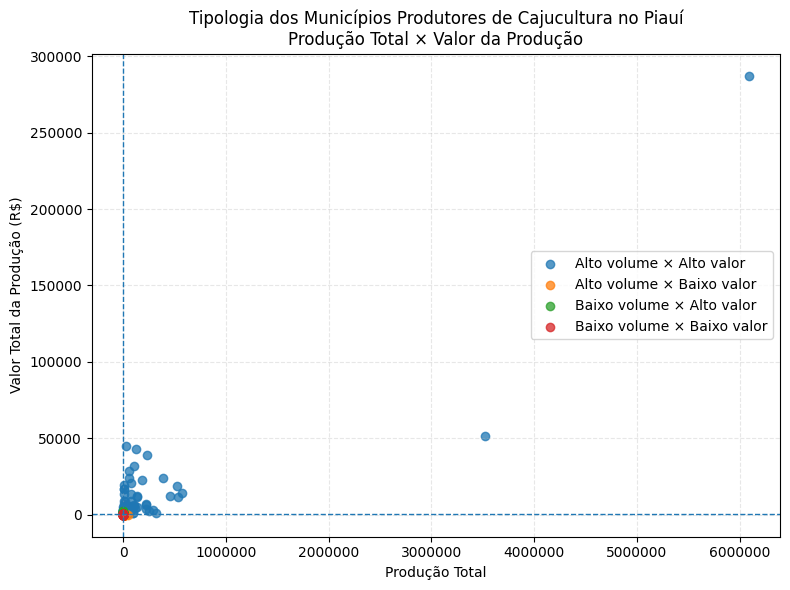

In [82]:
# Base do Bloco A
base_a = (
    piaui_municipios
    .groupby("nome_municipio", as_index=False)
    .agg({
        "producao_total": "sum",
        "valor_total_producao": "sum"
    })
    .dropna()
)

# Medianas estaduais
med_producao = base_a["producao_total"].median()
med_valor = base_a["valor_total_producao"].median()

# Tipologia
base_a["tipologia"] = np.select(
    [
        (base_a["producao_total"] >= med_producao) &
        (base_a["valor_total_producao"] >= med_valor),

        (base_a["producao_total"] >= med_producao) &
        (base_a["valor_total_producao"] < med_valor),

        (base_a["producao_total"] < med_producao) &
        (base_a["valor_total_producao"] >= med_valor)
    ],
    [
        "Alto volume × Alto valor",
        "Alto volume × Baixo valor",
        "Baixo volume × Alto valor"
    ],
    default="Baixo volume × Baixo valor"
)

# Gráfico
fig, ax = plt.subplots(figsize=(8, 6))

for cat in base_a["tipologia"].unique():
    subset = base_a[base_a["tipologia"] == cat]
    ax.scatter(
        subset["producao_total"],
        subset["valor_total_producao"],
        label=cat,
        alpha=0.75
    )

ax.axvline(med_producao, linestyle="--", linewidth=1)
ax.axhline(med_valor, linestyle="--", linewidth=1)

ax.set_title(
    "Tipologia dos Municípios Produtores de Cajucultura no Piauí\n"
    "Produção Total × Valor da Produção"
)
ax.set_xlabel("Produção Total")
ax.set_ylabel("Valor Total da Produção (R$)")
ax.ticklabel_format(style="plain", axis="both")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


Gráfico A2 — Distribuição Percentual dos Municípios por Tipologia

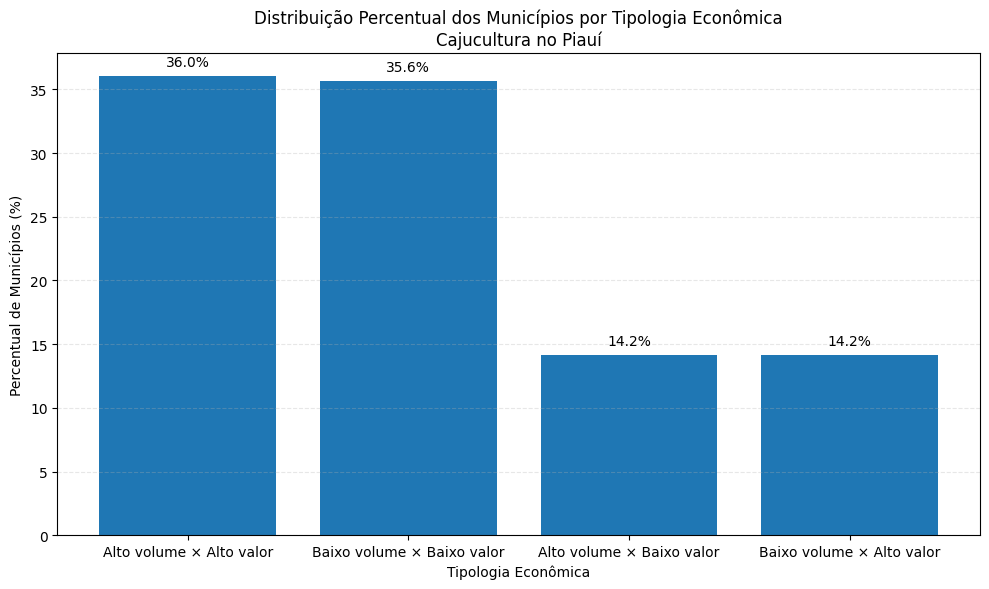

In [83]:
# Distribuição percentual
dist_tipologia = (
    base_a["tipologia"]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
)

dist_tipologia.columns = ["tipologia", "percentual"]

# Gráfico
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(
    dist_tipologia["tipologia"],
    dist_tipologia["percentual"]
)

ax.set_title(
    "Distribuição Percentual dos Municípios por Tipologia Econômica\n"
    "Cajucultura no Piauí"
)
ax.set_ylabel("Percentual de Municípios (%)")
ax.set_xlabel("Tipologia Econômica")

for i, v in enumerate(dist_tipologia["percentual"]):
    ax.text(i, v + 0.8, f"{v:.1f}%", ha="center")

ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


Gráfico A3 — Municípios Outliers

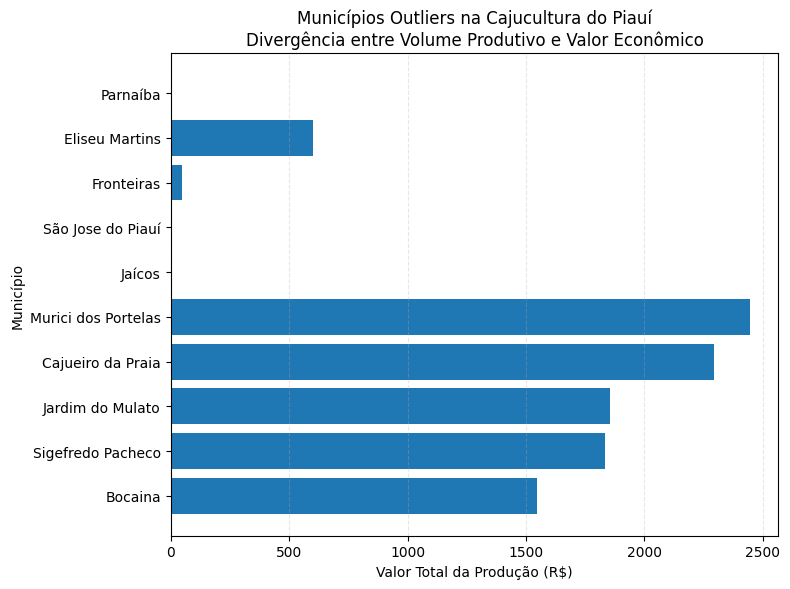

In [84]:
# Seleção de outliers
alto_vol_baixo_val = (
    base_a[base_a["tipologia"] == "Alto volume × Baixo valor"]
    .sort_values("producao_total", ascending=False)
    .head(5)
)

baixo_vol_alto_val = (
    base_a[base_a["tipologia"] == "Baixo volume × Alto valor"]
    .sort_values("valor_total_producao", ascending=False)
    .head(5)
)

outliers = pd.concat([alto_vol_baixo_val, baixo_vol_alto_val])

# Gráfico
fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(
    outliers["nome_municipio"],
    outliers["valor_total_producao"]
)

ax.set_title(
    "Municípios Outliers na Cajucultura do Piauí\n"
    "Divergência entre Volume Produtivo e Valor Econômico"
)
ax.set_xlabel("Valor Total da Produção (R$)")
ax.set_ylabel("Município")
ax.invert_yaxis()
ax.ticklabel_format(style="plain", axis="x")
ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


BLOCO B

Gráfico B1 — Produtividade Física × Valor por Hectare

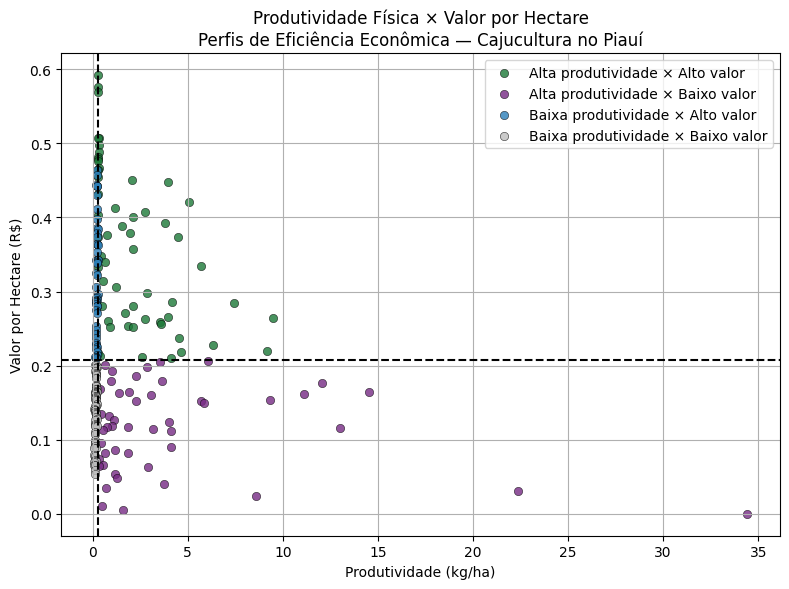

In [85]:
# Base B1
base_b1 = (
    eficiencia
    .dropna(subset=["produtividade_kg_ha", "valor_por_hectare"])
)

# Medianas
med_prod = base_b1["produtividade_kg_ha"].median()
med_valor_ha = base_b1["valor_por_hectare"].median()

# Classificação gerencial
base_b1["perfil"] = np.select(
    [
        (base_b1["produtividade_kg_ha"] >= med_prod) &
        (base_b1["valor_por_hectare"] >= med_valor_ha),

        (base_b1["produtividade_kg_ha"] >= med_prod) &
        (base_b1["valor_por_hectare"] < med_valor_ha),

        (base_b1["produtividade_kg_ha"] < med_prod) &
        (base_b1["valor_por_hectare"] >= med_valor_ha)
    ],
    [
        "Alta produtividade × Alto valor",
        "Alta produtividade × Baixo valor",
        "Baixa produtividade × Alto valor"
    ],
    default="Baixa produtividade × Baixo valor"
)

# Gráfico
fig, ax = plt.subplots(figsize=(8, 6))

cores_b1 = {
    "Alta produtividade × Alto valor": "#1b7837",
    "Alta produtividade × Baixo valor": "#762a83",
    "Baixa produtividade × Alto valor": "#2c7fb8",
    "Baixa produtividade × Baixo valor": "#bdbdbd"
}

for perfil, cor in cores_b1.items():
    subset = base_b1[base_b1["perfil"] == perfil]
    ax.scatter(
        subset["produtividade_kg_ha"],
        subset["valor_por_hectare"],
        color=cor,
        edgecolor="black",
        linewidth=0.4,
        alpha=0.8,
        label=perfil
    )

ax.axvline(med_prod, linestyle="--", color="black")
ax.axhline(med_valor_ha, linestyle="--", color="black")

ax.set_title(
    "Produtividade Física × Valor por Hectare\n"
    "Perfis de Eficiência Econômica — Cajucultura no Piauí"
)
ax.set_xlabel("Produtividade (kg/ha)")
ax.set_ylabel("Valor por Hectare (R$)")
ax.ticklabel_format(style="plain", axis="both")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


Gráfico B2 — Ranking Cruzado

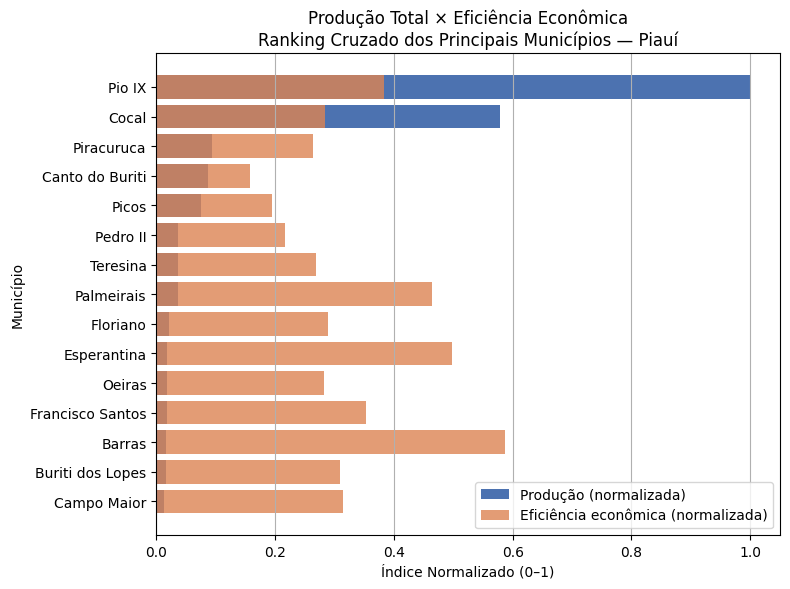

In [87]:
# Base B2
base_b2 = (
    piaui_municipios
    .groupby("nome_municipio", as_index=False)
    .agg({"producao_total": "sum"})
    .merge(
        eficiencia[["nome_municipio", "valor_por_hectare"]],
        on="nome_municipio",
        how="inner"
    )
    .dropna()
)

# Normalização (0–1)
base_b2["producao_norm"] = (
    base_b2["producao_total"] / base_b2["producao_total"].max()
)
base_b2["eficiencia_norm"] = (
    base_b2["valor_por_hectare"] / base_b2["valor_por_hectare"].max()
)

# Top 15 produtores
top15_b2 = (
    base_b2
    .sort_values("producao_total", ascending=False)
    .head(15)
)

# Gráfico
fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(
    top15_b2["nome_municipio"],
    top15_b2["producao_norm"],
    label="Produção (normalizada)",
    color="#4c72b0"
)

ax.barh(
    top15_b2["nome_municipio"],
    top15_b2["eficiencia_norm"],
    left=0,
    label="Eficiência econômica (normalizada)",
    color="#dd8452",
    alpha=0.8
)

ax.set_title(
    "Produção Total × Eficiência Econômica\n"
    "Ranking Cruzado dos Principais Municípios — Piauí"
)
ax.set_xlabel("Índice Normalizado (0–1)")
ax.set_ylabel("Município")
ax.invert_yaxis()
ax.legend()
ax.grid(axis="x")

plt.tight_layout()
plt.show()


Gráfico B3 — Gap de Eficiência Econômica Municipal

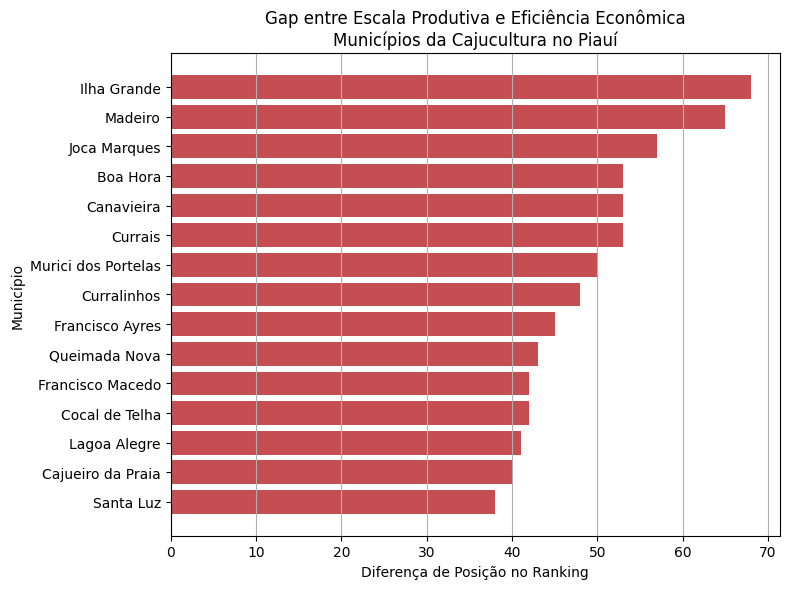

In [88]:
# Ranking
base_b2["rank_producao"] = base_b2["producao_total"].rank(ascending=False)
base_b2["rank_eficiencia"] = base_b2["valor_por_hectare"].rank(ascending=False)

base_b2["gap"] = base_b2["rank_producao"] - base_b2["rank_eficiencia"]

# Municípios com maior gap
top_gap = (
    base_b2
    .sort_values("gap", ascending=False)
    .head(15)
)

# Gráfico
fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(
    top_gap["nome_municipio"],
    top_gap["gap"],
    color="#c44e52"
)

ax.set_title(
    "Gap entre Escala Produtiva e Eficiência Econômica\n"
    "Municípios da Cajucultura no Piauí"
)
ax.set_xlabel("Diferença de Posição no Ranking")
ax.set_ylabel("Município")
ax.invert_yaxis()
ax.grid(axis="x")

plt.tight_layout()
plt.show()
